In [ ]:
#import preamble

from preamble import *

In [ ]:
upperB = 1e6
lowerB = 1000

lpBounds = -1e4
upBounds = 1e4

gbounds =  {
            'ABounds': [lowerB, upperB],
            'A0Bounds': [lowerB, upperB],
            'A1Bounds': [lowerB, upperB],
        
            'TaBounds': [lowerB, upperB],
            'Ta0Bounds': [lowerB, upperB],
            'Ta1Bounds': [lowerB, upperB],

            'Y0Bounds':(0.2, 0.8),
            'Y1Bounds':(0.2, 0.8),
    
            'beta0Bounds':(-2, 2),
            'beta1Bounds':(-2, 2),
        
            'sigma0Bounds':(1, 50000),
            'sigma1Bounds':(1, 50000),
        
            'lowerDevolTemp': 300.0,
    
            'a0Bounds': [lpBounds, upBounds], 'a1Bounds': [lpBounds, upBounds],
            'b0Bounds': [lpBounds, upBounds], 'b1Bounds': [lpBounds, upBounds],
            'c0Bounds': [lpBounds, upBounds], 'c1Bounds': [lpBounds, upBounds],
            'd0Bounds': [lpBounds, upBounds], 'd1Bounds': [lpBounds, upBounds],
            }

upperB = 5e4
lowerB = 5e3
gasybounds =  {
            'ABounds': [lowerB, upperB],
            'A0Bounds': [lowerB, upperB],
            'A1Bounds': [lowerB, upperB],
        
            'TaBounds': [lowerB, upperB],
            'Ta0Bounds': [lowerB, upperB],
            'Ta1Bounds': [lowerB, upperB],

            'Y0Bounds':(0.2, 0.8),
            'Y1Bounds':(0.2, 0.8),
    
            'beta0Bounds':(-2, 2),
            'beta1Bounds':(-2, 2),
        
            'sigma0Bounds':(1, 50000),
            'sigma1Bounds':(1, 50000),
        
            'lowerDevolTemp': 300.0,
    
            'a0Bounds': [lpBounds, upBounds], 'a1Bounds': [lpBounds, upBounds],
            'b0Bounds': [lpBounds, upBounds], 'b1Bounds': [lpBounds, upBounds],
            'c0Bounds': [lpBounds, upBounds], 'c1Bounds': [lpBounds, upBounds],
            'd0Bounds': [lpBounds, upBounds], 'd1Bounds': [lpBounds, upBounds],
            }

In [3]:
tempCurve = [
 (0,300),
 (0.00069361169602416345, 325.82868957519531),
 (0.0020223912895926334, 522.97321065266931),
 (0.0025511708831611034, 625.50918528238935),
 (0.0033511708831611034, 725.50918528238935),
 (0.004, 825.50918528238935),
 (0.0046799504767295729, 998.43212742959304),
 (0.005799504767295729,  1100.43212742959304),
 (0.0060087300702980437, 1216.6817141446199),
 (0.0065087300702980437, 1275.6817141446199),
 (0.0073375096638665128, 1343.5946451822917),
 (0.0080375096638665128, 1400.5946451822917),
 (0.0086662892574349837, 1466.5650006462547),
 (0.0099950688510034528, 1462.8053842397837),
 (0.011323848444571924, 1470.1890337544103)]

tempCurve2 = [(t/2, T) for t,T in tempCurve]

In [4]:
import pkp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
#import preamble
#from preamble import *


In [6]:
ultimate_analysis_pittsburgh = {
    "Carbon": 71.9, "Hydrogen": 4.4,
    "Nitrogen": 1.5, "Oxygen": 6.53,
    "Sulphur": 0.44}

proximate_analysis_pittsburgh = {
    "Fixed Carbon": 57.9, "Moisture": 2.6,
    "Volatile Matter": 26.9,  "Ash": 15.2}

In [7]:
cpd_params = {'active': 'True', 'deltaT': '0.5e-05', 'MW_TAR': '130'}

input_dict_pittsburgh = {'Coal': {
        'Proximate Analysis': proximate_analysis_pittsburgh,
        'Ultimate Analysis': ultimate_analysis_pittsburgh,
        'hhv': 30940, 'MW_PS': 100},
    'CPD': cpd_params, 'OperatingConditions': {}}

# direct temp curve specification
#input_dict_pittsburgh['OperatingConditions'] = {
#    'run0':tempCurve, 'pressure': 1.0, 'runs': 1}

# parameterised curve specification
input_dict_pittsburgh['OperatingConditions'] = {
    'run0':tempCurve, 'pressure': 1.0, 'runs': 1,
    #'run1':tempCurve2

}

In [8]:
cpd_pittsburgh = pkp.generate(json_string=input_dict_pittsburgh)
cpd_pittsburgh['run0'].timesteps = 25
#cpd_pittsburgh['run1'].timesteps = 25

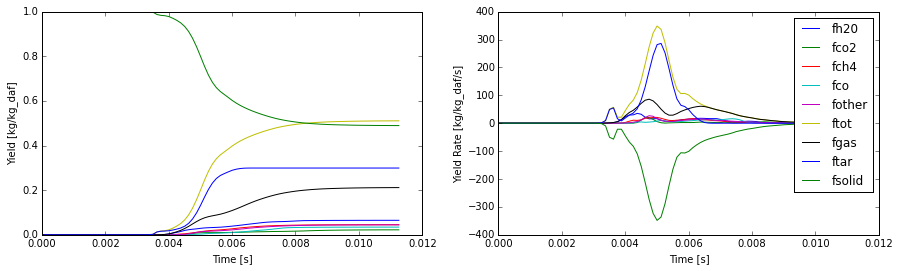

In [9]:
f = cpd_pittsburgh['run0'].plot_species()
f[0].set_figwidth(15)

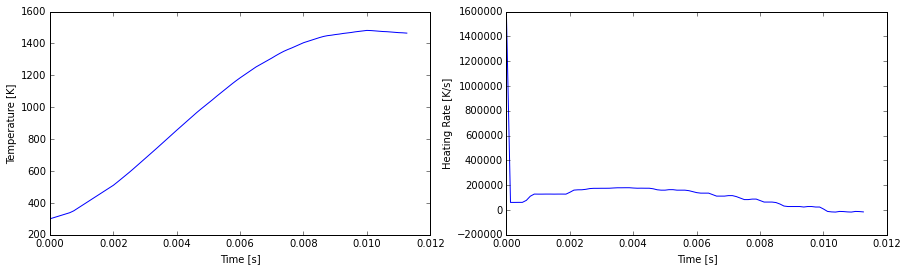

In [10]:
f = cpd_pittsburgh['run0'].plot_temp()
f[0].set_figwidth(15)

In [11]:
print "Qfactor: ", cpd_pittsburgh['run0'].qFactor

Qfactor:  1.60993903346


In [28]:
from pkp.src.Models import arrheniusRate

inp = {'arrheniusRate': gbounds}

arrhRate_pittsburgh = arrheniusRate(inp, {'run0':cpd_pittsburgh.values()[0]}, 'ftot')

x = arrhRate_pittsburgh.fit(method="differential_evolution")

Initialised arrheniusRate Model
preliminary optimisation: ftot
bounds [[1000, 1000000.0], [1000, 1000000.0]]
run 0 'A': 652031.24965006823 'Ta': 7128.9202122304705 error 0.0407816363169 after 0.403060913086s seconds


(<matplotlib.figure.Figure at 0x7ff492018490>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff491b89550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff491b1d850>], dtype=object))

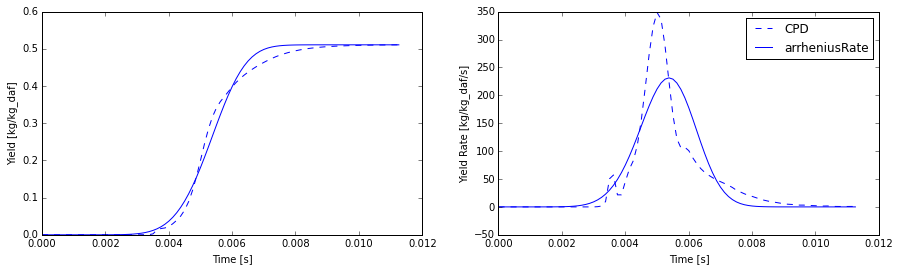

In [29]:
x.plot_yield()

(<matplotlib.figure.Figure at 0x7ff491a07a10>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4919fcc50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff49192bc90>], dtype=object))

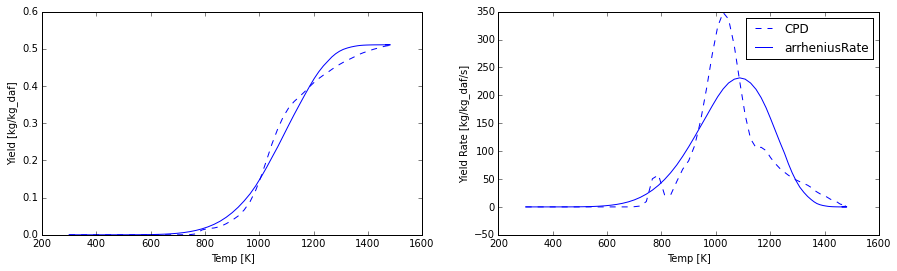

In [30]:
x.plot_yield("temp")

# Kobayashi (symmetric)

In [16]:
from pkp.src.Models import KobayashiThermolysis
from pkp.src.Models import KobayashiBetaThermolysis

In [18]:
inp = {'Kobayashi': gbounds}

arrhRate_pittsburgh = KobayashiThermolysis(inp, {'run0':cpd_pittsburgh.values()[0]}, 'ftot')
x = arrhRate_pittsburgh.fit(
    method="differential_evolution", differential_evolution_args={'popsize':30, 'tol':0.001}
)

Initialised Kobayashi Model
preliminary optimisation: ftot
bounds [[1000, 1000000.0], [1000, 1000000.0], (0.2, 0.8), [1000, 1000000.0], [1000, 1000000.0], (0.2, 0.8)]
run 0 'A0': 379455.51309805195 'Ta0': 7255.4120780160356 'Y0': 0.50508027596576632 'A1': 48263.640054598975 'Ta1': 243989.79620190614 'Y1': 0.68688775619403786 error 0.0380977794206 after 6.43306207657s seconds


(<matplotlib.figure.Figure at 0x7ff4940ec310>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff49414d750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff492143e50>], dtype=object))

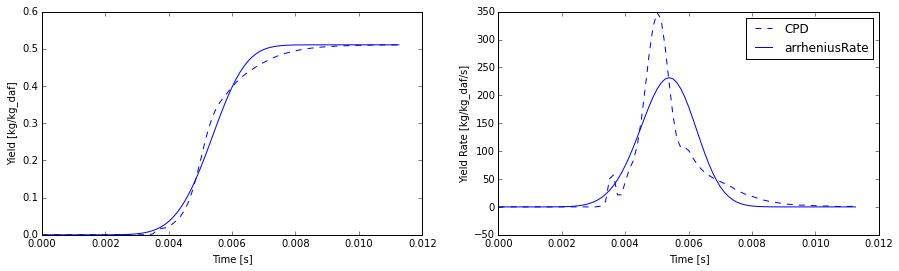

In [23]:
x.plot_yield()

(<matplotlib.figure.Figure at 0x7ff49202e810>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4920a6e50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff491fe0190>], dtype=object))

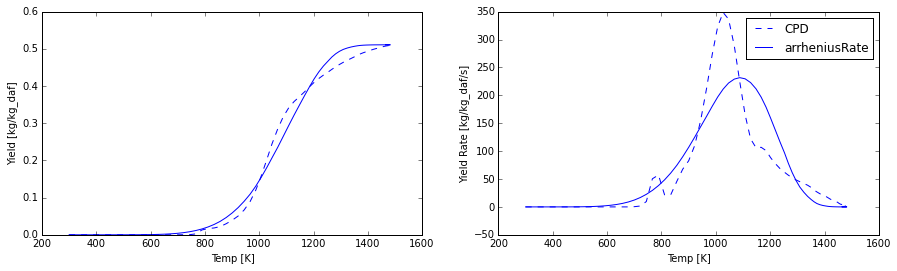

In [24]:
x.plot_yield("temp")

In [21]:
inp = {'KobayashiBeta': gbounds}

arrhRate_pittsburgh = KobayashiBetaThermolysis(inp, {'run0':cpd_pittsburgh.values()[0]}, 'ftot')
x = arrhRate_pittsburgh.fit(
    # delta=0.08, finalOpt=False, splits=1, preOptRefinements=1, narrowing=0.75,
    method="differential_evolution", differential_evolution_args={'popsize':30, 'tol':0.001}
)

Initialised KobayashiBeta Model
preliminary optimisation: ftot
bounds [[1000, 1000000.0], [1000, 1000000.0], (0.2, 0.8), (-2, 2), [1000, 1000000.0], [1000, 1000000.0], (0.2, 0.8), (-2, 2)]
run 0 'A0': 991340.71408862132 'Ta0': 7334.9081530974427 'Y0': 0.50486552483806146 'beta0': -0.12710905373853479 'A1': 521055.34847540146 'Ta1': 24701.547502265836 'Y1': 0.60944308824850058 'beta1': 1.1765697458311821 error 0.0379786000138 after 18.2631869316s seconds


(<matplotlib.figure.Figure at 0x7fedd3a8d690>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fedd3aee690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fede1beb1d0>], dtype=object))

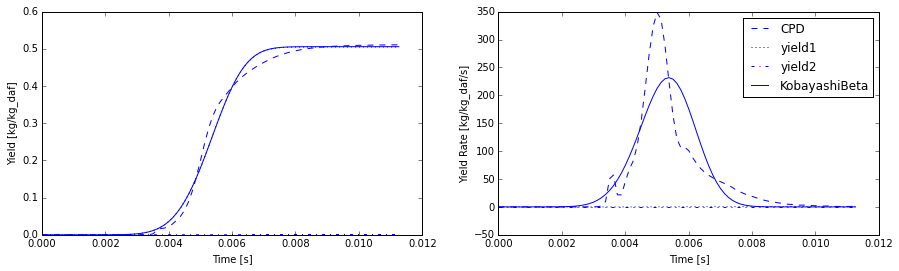

In [22]:
x.plot_yield()

#  Richardson Fletcher

In [15]:
from pkp.src.Models import RichardsonFletcherThermolysis
from pkp.src.Models import RichardsonFletcherPolyThermolysis

In [25]:
inp = {'RichardsonFletcher': gbounds}

arrhRate_pittsburgh = RichardsonFletcherThermolysis(inp, {'run0':cpd_pittsburgh.values()[0]}, 'ftot')
x = arrhRate_pittsburgh.fit(
    #delta=0.08, finalOpt=False, splits=1,  preOptRefinements=1, narrowing=0.75,
    method="differential_evolution", differential_evolution_args={'popsize':10, 'tol':0.01}
)


Initialised RichardsonFletcher Model
preliminary optimisation: ftot
bounds [[1000, 1000000.0], [1000, 1000000.0], (0.2, 0.8), (1, 50000), [1000, 1000000.0], [1000, 1000000.0], (0.2, 0.8), (1, 50000)]
run 0 'A0': 566880.59059698705 'Ta0': 412217.09639609628 'Y0': 0.50663995710605692 'sigma0': 43915.312153406659 'A1': 10798.817699770094 'Ta1': 530295.55051559384 'Y1': 0.48982562704088661 'sigma1': 29803.92458682607 error 0.0349809877948 after 477.068536043s seconds


(<matplotlib.figure.Figure at 0x7ff491f22d10>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff491f22050>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff491df55d0>], dtype=object))

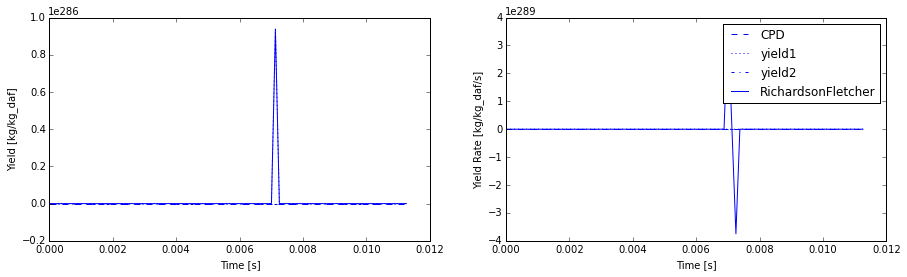

In [26]:
x.plot_yield()

(<matplotlib.figure.Figure at 0x7ff491cf6750>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff491d5c250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff491c98a10>], dtype=object))

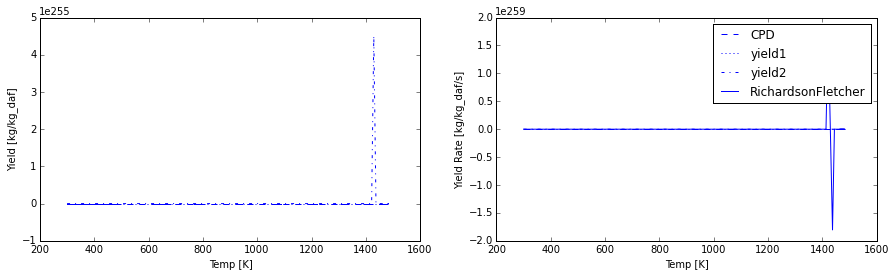

In [27]:
x.plot_yield("temp")

# Richardson Fletcher Poly

In [16]:
inp = {'RichardsonFletcher': gbounds}

arrhRate_pittsburgh = RichardsonFletcherPolyThermolysis(inp, {'run0':cpd_pittsburgh.values()[0]}, 'ftot')
x = arrhRate_pittsburgh.fit(
    #delta=0.08, finalOpt=False, splits=1, preOptRefinements=1, narrowing=0.75,
    method="differential_evolution", differential_evolution_args={'popsize':10, 'tol':0.01}
)


Initialised RichardsonFletcher Model
preliminary optimisation: ftot
bounds [[1000, 1000000.0], [1000, 1000000.0], (0.2, 0.8), [-10000.0, 10000.0], [-10000.0, 10000.0], [-10000.0, 10000.0], [-10000.0, 10000.0], [1000, 1000000.0], [1000, 1000000.0], (0.2, 0.8), [-10000.0, 10000.0], [-10000.0, 10000.0], [-10000.0, 10000.0], [-10000.0, 10000.0]]


/usr/local/lib/python2.7/dist-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


run 0 'A0': 361702.62915238971 'Ta0': 345787.54705647496 'Y0': 0.51095450327866887 'a0': -3186.3526421433339 'b0': -6531.9466735274909 'c0': 9981.4993409057333 'd0': -1879.6232185078932 'A1': 11014.451643569786 'Ta1': 493048.974363229 'Y1': 0.65028030614324628 'a1': 289.58592405166519 'b1': -3171.143731170599 'c1': -4757.4581606922538 'd1': -641.63028467291713 error 0.00458591688396 after 74.6208779812s seconds


(<matplotlib.figure.Figure at 0x7ff4923ee890>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff492413350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff4943c1510>], dtype=object))

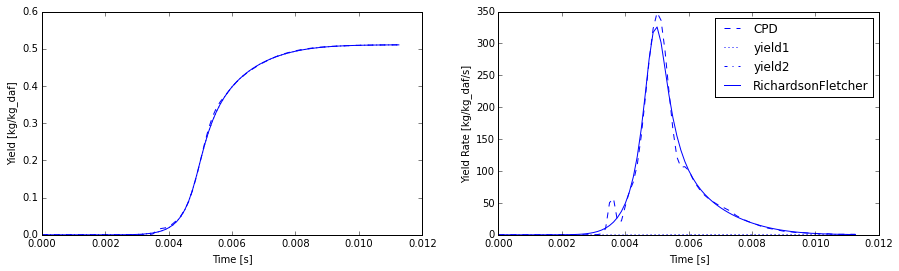

In [19]:
x.plot_yield()

(<matplotlib.figure.Figure at 0x7ff4945488d0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff494356b50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff494405c50>], dtype=object))

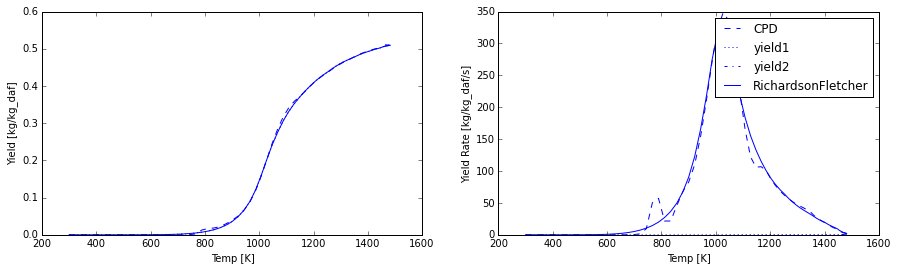

In [20]:
x.plot_yield("temp")